# Image blending 

In [ ]:
#it is used to blend or merge two images

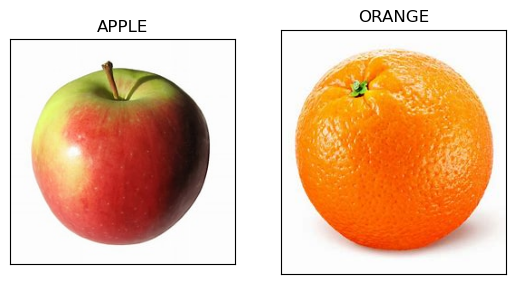

In [10]:
#display two different images in matplotlib with original color
#rading both images
import cv2
import matplotlib.pyplot as plt
import numpy as np
apple=cv2.imread("apple.jfif")
orange=cv2.imread("orange.jfif")
#changing image rgb format to bgr format
apple=cv2.cvtColor(apple,cv2.COLOR_RGB2BGR)
orange=cv2.cvtColor(orange,cv2.COLOR_RGB2BGR)
#displaying both images
plt.subplot(121)
plt.imshow(apple)
plt.title("APPLE")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(orange)
plt.title("ORANGE")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
#blend apple half right side and orange half left side
#both image must be same size
print(apple.shape)
print(orange.shape)#both images or not same so we have to resize both images
resized_apple=cv2.resize(apple,(250,250))
resized_orange=cv2.resize(orange,(250,250))
print("--------------------")
print(resized_apple.shape)
print(resized_orange.shape)

(250, 250, 3)
(270, 249, 3)
--------------------
(250, 250, 3)
(250, 250, 3)


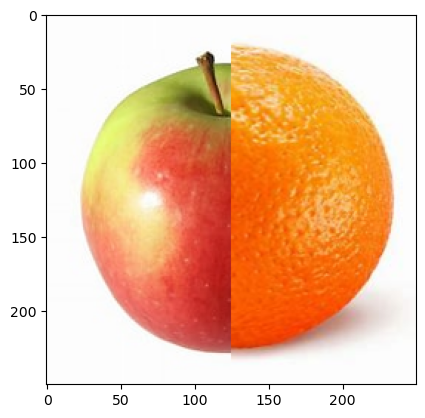

In [13]:
#using hstack() function we can blend both images
#np.hstack: This is a function from the numpy library, used for horizontally stacking arrays (joining them side by side).
blend1=np.hstack((resized_apple[:,:125],resized_orange[:,125:]))
plt.imshow(blend1)

In [ ]:
#in up we can see the blending image but there joining position we can see the one line to avoid that we can use image pyramid to blend two images


In [43]:
#create gussian
g_apple=cv2.pyrDown(resized_apple)
g_orange=cv2.pyrDown(resized_orange)
#create laplacian
extend_apple=cv2.pyrUp(g_apple)
extend_orange=cv2.pyrUp(g_orange)
l_apple=np.subtract(resized_apple,extend_apple)
l_orange=np.subtract(resized_orange,extend_orange)
cv2.imshow("kk",l_apple)
cv2.imshow("kKK",l_orange)
#blend
blend=np.hstack((l_apple[:,:125],l_orange[:,125:]))
cv2.imshow("blend",blend)
#reconstruct
for i in range(1,6):
    blend=cv2.pyrUp(blend)
    blend=cv2.add(blend,blend)
cv2.imshow("reconstruct",blend)
cv2.waitKey()
cv2.destroyAllWindows()